In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
plt.style.use('fivethirtyeight')

In [3]:
# load the properties data
properties = pd.read_csv('properties_2016.csv', low_memory=False)
pd.options.display.max_columns = None
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
dtype_df = properties.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [5]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,52
2,object,5


In [6]:
# Rename variables
properties.rename(index=str,columns={
"parcelid" : "id_parcel",
"basementsqft" : "area_basement",
"yearbuilt" : 'build_year',
"yardbuildingsqft17" : "area_patio",
"yardbuildingsqft26" : "area_shed",
"poolsizesum" : "area_pool",
"lotsizesquarefeet" : "lot_size",
"garagetotalsqft" : "area_garage",
"finishedfloor1squarefeet" : "area_firstfloor_finished",
"calculatedfinishedsquarefeet" : "area_total_calc",
"finishedsquarefeet6" : "area_base",
"finishedsquarefeet12" : "area_finished_living",
"finishedsquarefeet13" : "area_perimeter",
"finishedsquarefeet15" : "area_total_finished",
"finishedsquarefeet50" : "area_other",
"unitcnt" : "unit_count",
"numberofstories" : "number_of_stories",
"roomcnt" : "room_count",
"bathroomcnt" : "bath_count",
"bedroomcnt" : "bedroom_count",
"calculatedbathnbr" : "bath_count_calc",
"fullbathcnt" : "bath_full_count",
"threequarterbathnbr" : "bath_3qtrs_count",
"fireplacecnt" : "fireplace_count",
"poolcnt" : "pool_count",
"garagecarcnt" : "garage_stalls_count",
"regionidcounty" : "region_county",
"regionidcity" : "region_city",
"regionidzip" : "region_zip",
"regionidneighborhood" : "region_neighbor",
"taxvaluedollarcnt" : "home_value",
"structuretaxvaluedollarcnt" : "tax_building",
"landtaxvaluedollarcnt" : "tax_land",
"taxamount" : "tax_property",
"assessmentyear" : "tax_year",
"taxdelinquencyflag" : "tax_delinquency",
"taxdelinquencyyear" : "tax_delinquency_year",
"propertyzoningdesc" : "zoning_property",
"propertylandusetypeid" : "zoning_land_use",
"propertycountylandusecode" : "zoning_land_use_county",
"fireplaceflag" : "fireplace",
"hashottuborspa" : "tub",
"buildingqualitytypeid" : "bldg_quality",
"buildingclasstypeid" : "bldg_framing",
"typeconstructiontypeid" : "bldg_material",
"decktypeid" : "deck_type",
"storytypeid" : "story_type",
"airconditioningtypeid" : "airconditioning",
"architecturalstyletypeid" : "architectural_style"
},inplace=True)

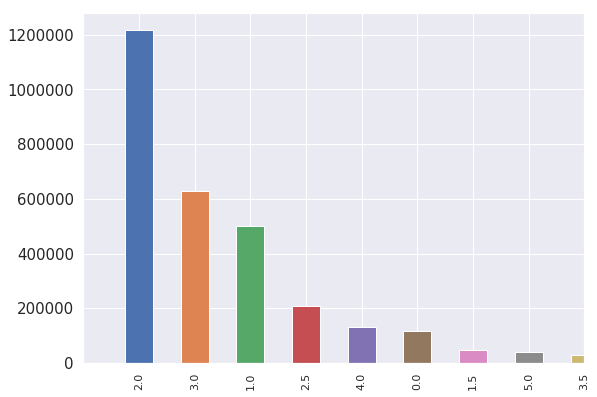

In [7]:
sns.set(rc={'figure.figsize':(8,6)})
properties['bath_count'].value_counts().plot(kind='bar')
plt.yticks(fontsize=15)
plt.xlim(-1,8)
plt.show()

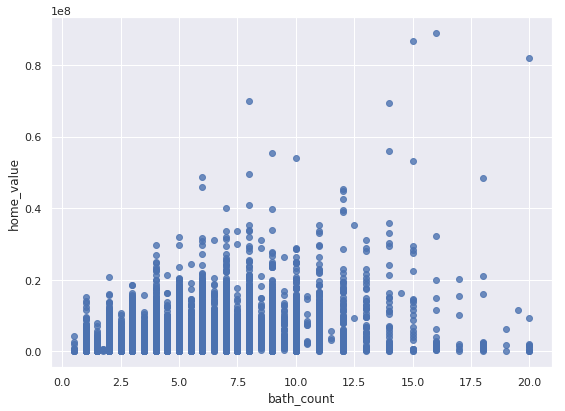

In [8]:
sns.regplot(x=properties['bath_count'].where(properties['bath_count']>0),
            y=properties['home_value'],fit_reg=False)

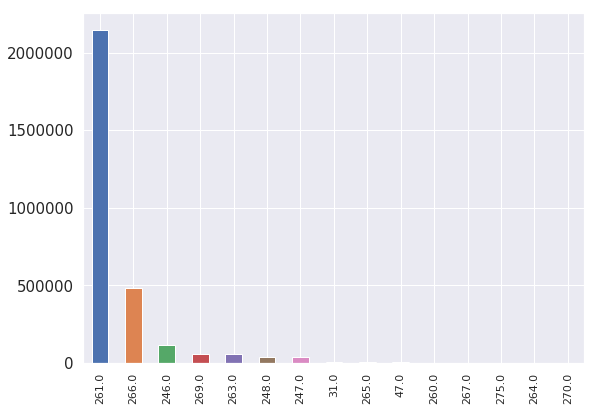

In [9]:
properties['zoning_land_use'].value_counts().plot(kind='bar')
plt.yticks(fontsize=15)
plt.show()

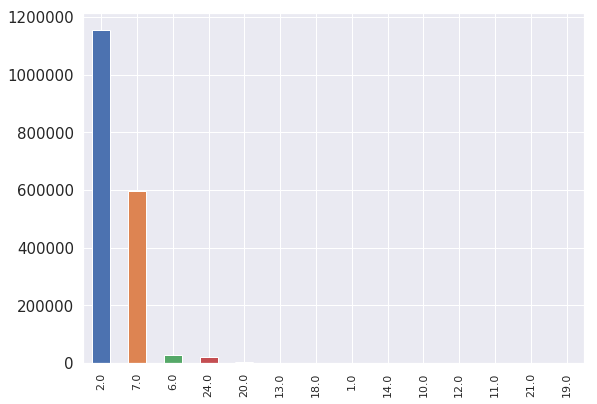

In [10]:
properties['heatingorsystemtypeid'].value_counts().plot(kind='bar')
plt.yticks(fontsize=15)
plt.show()

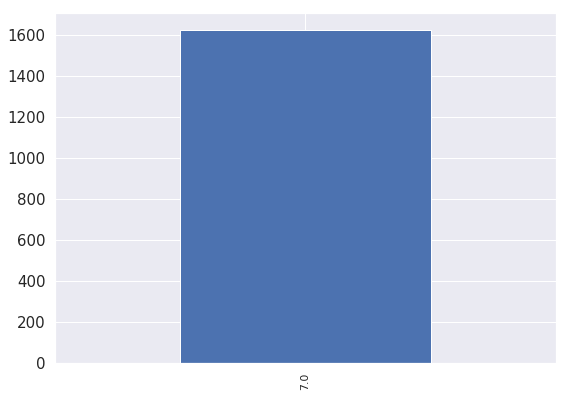

In [11]:
properties['story_type'].value_counts().plot(kind='bar')
plt.yticks(fontsize=15)
plt.show()

In [12]:
# Summary statistics for target variable
min  = properties['home_value'].min()
max  = properties['home_value'].max()
mean = properties['home_value'].mean()
med  = properties['home_value'].quantile(0.5)
p1   = properties['home_value'].quantile(0.01)
p99  = properties['home_value'].quantile(0.99)
print('min=', min, 
      'max=', max, 
      'mean=', mean, 
      'median=', med, 
      'p1=', p1, 
      'p99=', p99)

('min=', 1.0, 'max=', 282786000.0, 'mean=', 420478.99067852396, 'median=', 306086.0, 'p1=', 25443.0, 'p99=', 2330146.34)


In [13]:
# Square footage variables EDA

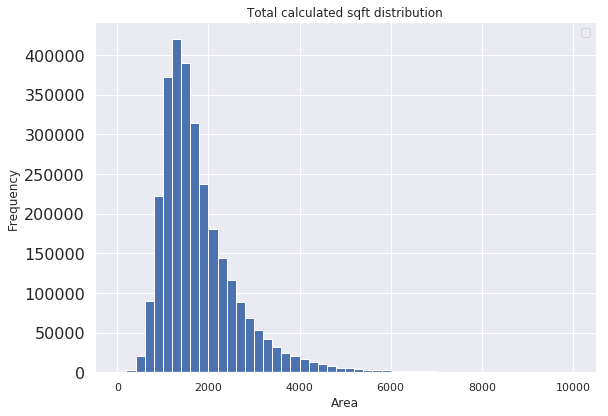

In [14]:
var = properties['area_total_calc']
var.fillna(properties['area_total_calc'].median())
var.where(var<10000).hist(bins=50)

plt.title('Total calculated sqft distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.yticks(fontsize=16)
plt.legend()
plt.show()

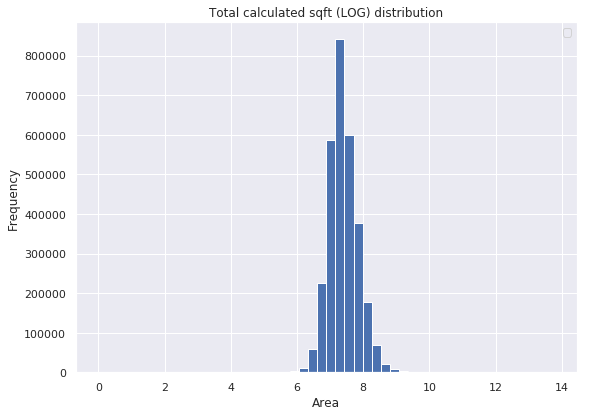

In [15]:
var = np.log(properties['area_total_calc'].fillna(properties['area_total_calc'].median()))
var.hist(bins=50)

plt.title('Total calculated sqft (LOG) distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

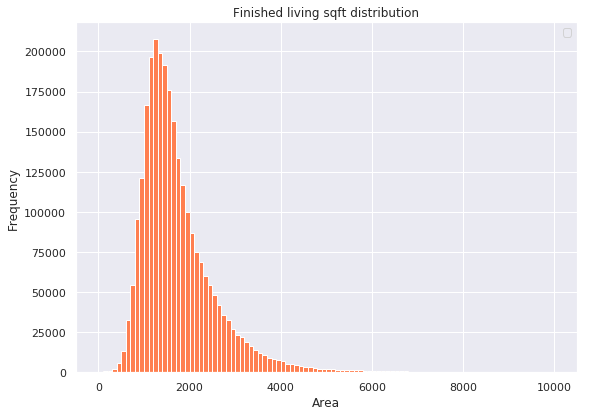

In [16]:
var = properties['area_finished_living']
var.fillna(var.median())
var.where(var<10000).hist(bins=100,color='coral')

plt.title('Finished living sqft distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

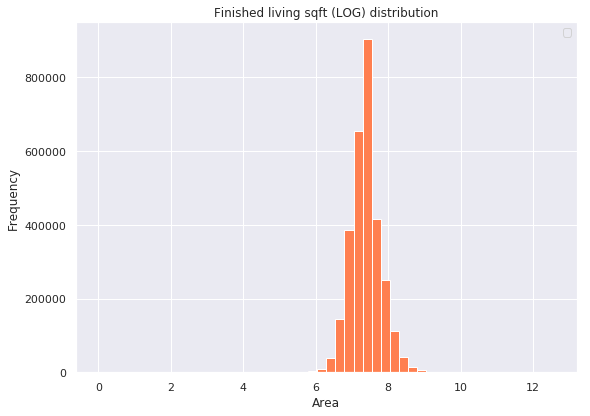

In [17]:
var = np.log(properties['area_finished_living'].fillna(properties['area_finished_living'].median()))
var.hist(bins=50, color='coral')

plt.title('Finished living sqft (LOG) distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

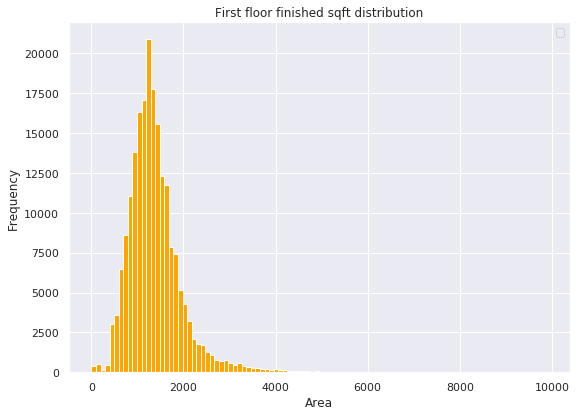

In [18]:
var = properties['area_firstfloor_finished']
var.where(var<10000).hist(bins=100, color='orange')

plt.title('First floor finished sqft distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

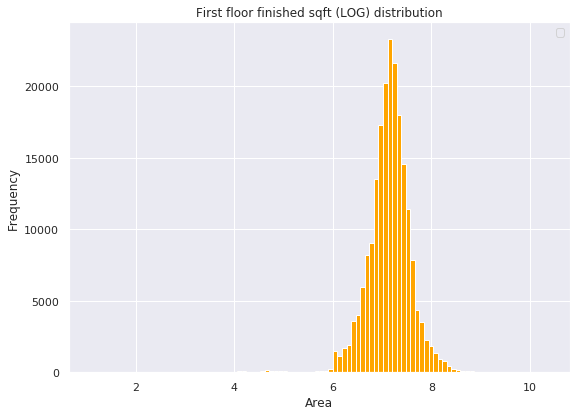

In [19]:
var = np.log(properties['area_firstfloor_finished'])
var.hist(bins=100, color='orange')

plt.title('First floor finished sqft (LOG) distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

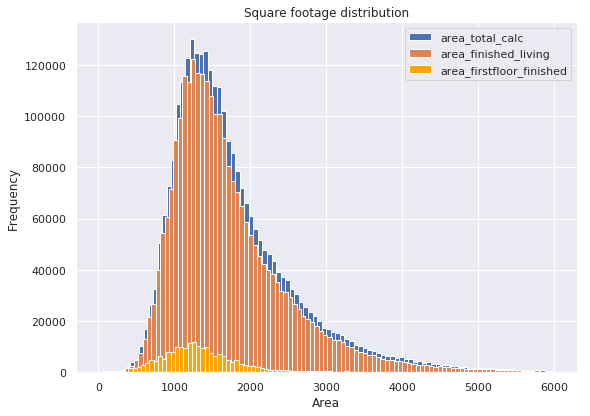

In [20]:
var1 = properties['area_total_calc']
var1.where(var1<6000).hist(bins=100, label='area_total_calc')

var2 = properties['area_finished_living']
var2.where(var2<5800).hist(bins=100,label='area_finished_living')

var3 = properties['area_firstfloor_finished']
var3.where(var3<5600).hist(bins=100, label='area_firstfloor_finished', color='orange')

plt.title('Square footage distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

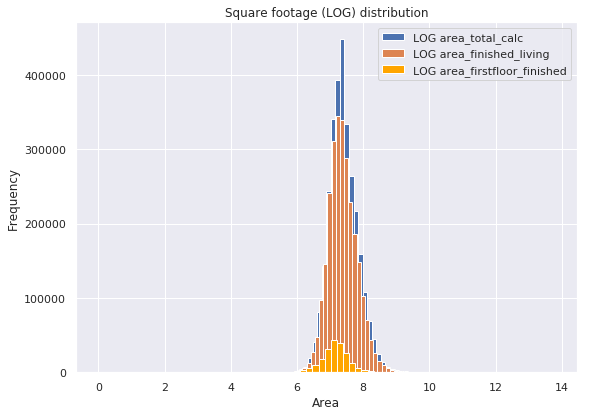

In [21]:
var1 = np.log(properties['area_total_calc'].fillna(properties['area_total_calc'].median()))
var1.where(var1<6000).hist(bins=100, label='LOG area_total_calc')

var2 = np.log(properties['area_finished_living'])
var2.where(var2<6000).hist(bins=100,label='LOG area_finished_living')

var3 = np.log(properties['area_firstfloor_finished'])
var3.where(var3<6000).hist(bins=50, label='LOG area_firstfloor_finished', color='orange')

plt.title('Square footage (LOG) distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.legend()
plt.show()

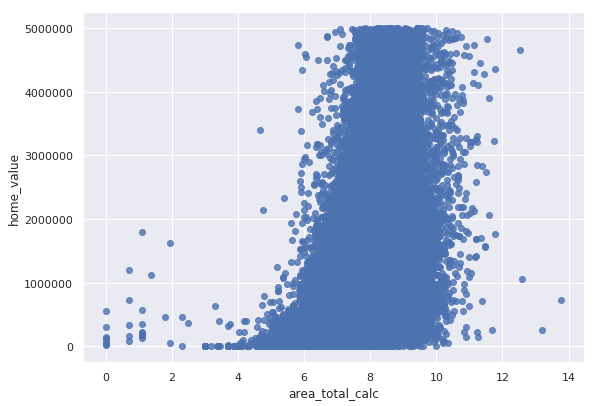

In [22]:
sns.regplot(x=np.log(properties['area_total_calc']),
            y=properties['home_value'].where(properties['home_value']<5000000), fit_reg=False)

In [23]:
# Number of rooms EDA

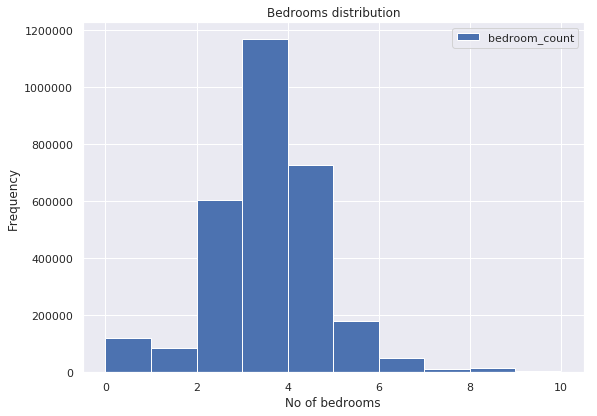

In [24]:
var2 = properties['bedroom_count']
var2.where(var2<=10).hist(bins=10,label='bedroom_count')
plt.title('Bedrooms distribution')
plt.xlabel('No of bedrooms')
plt.ylabel('Frequency')
plt.legend()
plt.show()

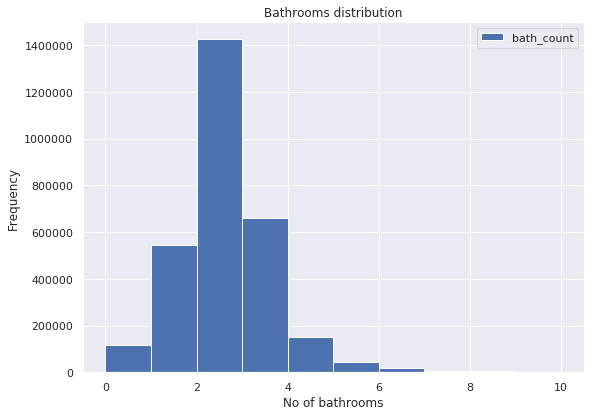

In [25]:
var3 = properties['bath_count']
var3.where(var3<=10).hist(bins=10, label='bath_count')
plt.title('Bathrooms distribution')
plt.xlabel('No of bathrooms')
plt.ylabel('Frequency')
plt.legend()
plt.show()

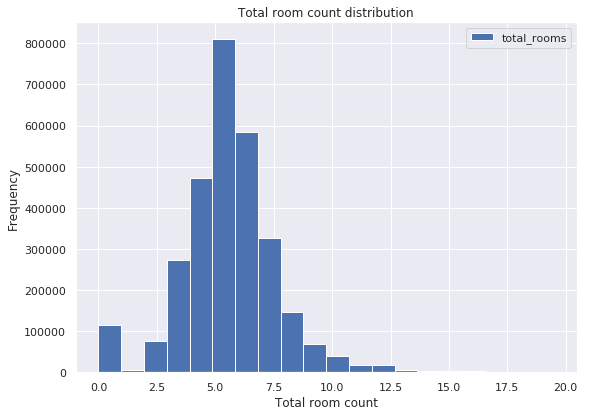

In [26]:
var1 = properties['bath_count'] + properties['bedroom_count']
var1.where(var1<20).hist(bins=20, label='total_rooms')
plt.title('Total room count distribution')
plt.xlabel('Total room count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

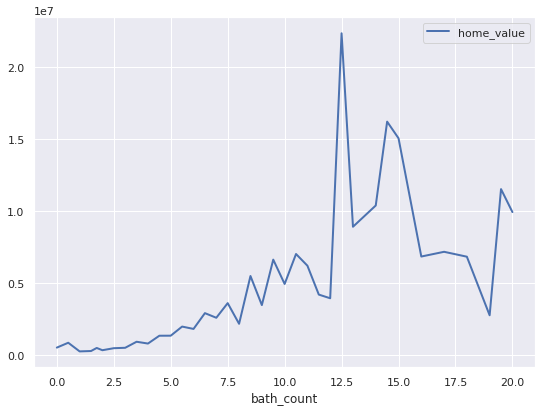

In [27]:
# Mean home values by bathroom count
grp2 = pd.DataFrame(properties.groupby('bath_count')['home_value'].mean())
grp2.reset_index(inplace = True)
grp2.plot(x='bath_count', y='home_value', linewidth=2.0)

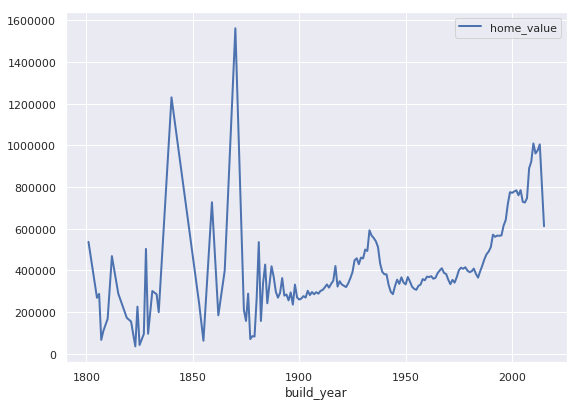

In [28]:
# Mean home values by build year
grp1 = pd.DataFrame(properties.groupby('build_year')['home_value'].mean())
grp1.reset_index(inplace = True)
grp1.plot(x='build_year', y='home_value', linewidth=2.0)

In [29]:
# DATA TRANSFORMATIONS

# Calculated variables
properties['property_age'] = 2018 - properties['build_year']+1
properties['length_tax_delinq'] = 2018 - properties['tax_delinquency_year']+1
properties['total_rooms'] = properties['bath_count_calc'] + properties['bedroom_count']

# Dummy variables
properties['garage_yn'] = np.where((properties['garage_stalls_count'] > 0) | (properties['area_garage'] > 0),1,0)
properties['ac_yn'] = (properties['airconditioning']!=5)*1
properties['heat_yn'] = (properties['heatingorsystemtypeid']!=13)*1

properties['property_type'] = properties.zoning_land_use.replace({31 : "Mixed", 46 : "Other", 47 : "Mixed",
      246 : "Mixed", 247 : "Mixed", 248 : "Mixed",
      260 : "Home", 261 : "Home", 262 : "Home",
      263 : "Home", 264 : "Home", 265 : "Home",
      266 : "Home", 267 : "Home", 268 : "Home",
      269 : "Not Built", 270 : "Home", 271 : "Home",
      273 : "Home", 274 : "Other", 275 : "Home",
      276 : "Home", 279 : "Home", 290 : "Not Built",
      291 : "Not Built" }) 

properties['single_family_home'] = np.where(properties['zoning_land_use']==261, 1,0)

# Region density variables
properties['coords'] = properties['latitude']/(10^6) + properties['longitude']/(10^6)
zip_count = properties['region_zip'].value_counts().to_dict()
properties['zip_counts'] = properties['region_zip'].map(zip_count)
city_count = properties['region_city'].value_counts().to_dict()
properties['city_counts'] = properties['region_city'].map(city_count)
county_count = properties['region_county'].value_counts().to_dict()
properties['county_counts'] = properties['region_county'].map(county_count)

properties.drop(columns=['heatingorsystemtypeid','zoning_land_use',
                         'airconditioning','tax_delinquency_year','story_type','pooltypeid2',
                         'pooltypeid7','pooltypeid10'])

# Log variables 
properties['log_area_total_calc'] = np.log(properties['area_total_calc'].fillna(properties['area_total_calc'].median()))
properties['log_area_finished_living'] = np.log(properties['area_finished_living'].fillna(properties['area_finished_living'].median()))
properties['log_area_firstfloor_finished'] = np.log(properties['area_firstfloor_finished'])

properties.head()

,id_parcel,airconditioning,architectural_style,area_basement,bath_count,bedroom_count,bldg_framing,bldg_quality,bath_count_calc,deck_type,area_firstfloor_finished,area_total_calc,area_finished_living,area_perimeter,area_total_finished,area_other,area_base,fips,fireplace_count,bath_full_count,garage_stalls_count,area_garage,tub,heatingorsystemtypeid,latitude,longitude,lot_size,pool_count,area_pool,pooltypeid10,pooltypeid2,pooltypeid7,zoning_land_use_county,zoning_land_use,zoning_property,rawcensustractandblock,region_city,region_county,region_neighbor,region_zip,room_count,story_type,bath_3qtrs_count,bldg_material,unit_count,area_patio,area_shed,build_year,number_of_stories,fireplace,tax_building,home_value,tax_year,tax_land,tax_property,tax_delinquency,tax_delinquency_year,censustractandblock,property_age,length_tax_delinq,total_rooms,garage_yn,ac_yn,heat_yn,property_type,single_family_home,coords,zip_counts,city_counts,county_counts,log_area_total_calc,log_area_finished_living,log_area_firstfloor_finished
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,Not Built,0,-7.042470e+06,8496.0,7506.0,2009362.0,7.360104,7.338888,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,Home,1,-7.040411e+06,8496.0,7506.0,2009362.0,7.360104,7.338888,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,Mixed,0,-7.033773e+06,9437.0,11686.0,2009362.0,11.198571,7.338888,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,71.0,NaN,NaN,0,1,1,Mixed,0,-7.024029e+06,7916.0,670925.0,2009362.0,8.530702,7.338888,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,72.0,NaN,NaN,0,1,1,Mixed,0,-7.015971e+06,7725.0,670925.0,2009362.0,7.482119,7.338888,NaN


In [30]:
# Trim top and bottom 1% of values
properties['log_home_value'] = np.log(properties['home_value']+0.00001)
high = np.percentile((properties['log_home_value'].dropna()),99)
low  = np.percentile((properties['log_home_value'].dropna()),1)
properties1 = properties[(properties['log_home_value'] > low) & (properties['log_home_value'] < high)].copy()

Text(500000,120000,'Average Home Value: $420K')

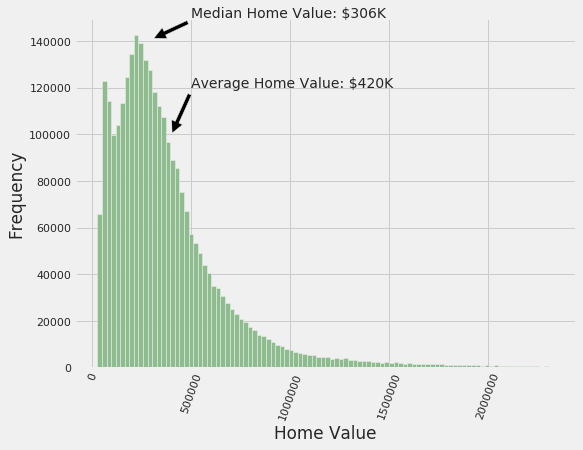

In [31]:
# Target variable distribution chart after trimming top/bottom 1%
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()
plt.hist((properties1['home_value']),bins=100, color='darkseagreen')
plt.ylabel('Frequency')
plt.xlabel('Home Value')
plt.xticks(rotation = 70)
ax.annotate('Median Home Value: $306K', xy=(305000,141000), xytext=(500000,150000),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax.annotate('Average Home Value: $420K', xy=(400000,100000), xytext=(500000,120000),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )

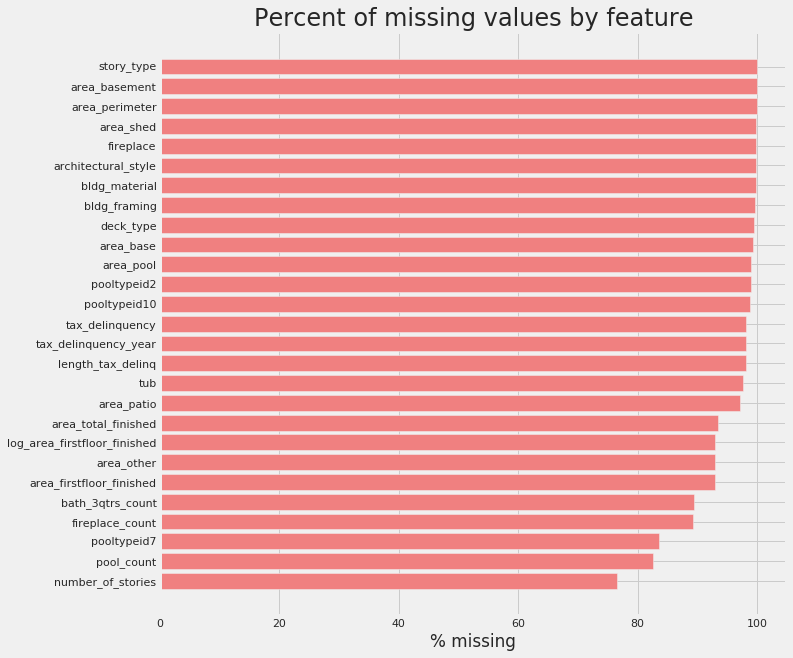

In [32]:
# Features with missing values
columns = properties1.columns
percent_missing = properties1.isnull().sum() * 100 / len(properties1)
missing_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_df.sort_values('percent_missing', inplace=True)

missing_df2=missing_df[missing_df['percent_missing']>75]
ind = np.arange(missing_df2.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(10,10))
rects = ax.barh(ind, missing_df2.percent_missing.values, color='lightcoral')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df2.column_name.values, rotation='horizontal')
ax.set_xlabel("% missing")
ax.set_title("Percent of missing values by feature", fontsize=24)
plt.show()

In [33]:
# Correlations
topcor = pd.DataFrame()
topcor = properties.drop(['tax_building','tax_property','log_home_value','build_year'], axis=1).corr()['home_value'].sort_values(ascending=False).reset_index()
topcor.columns = ["feature", 'corr_coef']
topcor['abs_corr']=topcor['corr_coef'].abs()
topcor.sort_values(by=['abs_corr'], ascending=False, inplace=True)
topcor

,feature,corr_coef,abs_corr
0,home_value,1.000000,1.000000
1,tax_land,0.873672,0.873672
2,area_total_finished,0.685283,0.685283
3,area_finished_living,0.596757,0.596757
4,area_other,0.537105,0.537105
5,area_total_calc,0.535773,0.535773
6,area_firstfloor_finished,0.530985,0.530985
7,bath_count_calc,0.463487,0.463487
8,area_basement,0.461338,0.461338
9,bath_full_count,0.449540,0.449540


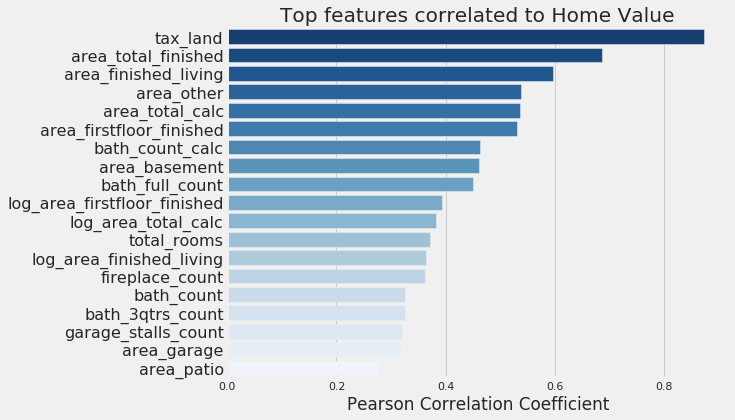

In [34]:
top15cor = topcor[1:20].reset_index()
sns.set(rc={'figure.figsize':(8,6)})
plt.style.use('fivethirtyeight')
sns.barplot(x=top15cor['corr_coef'],y=top15cor['feature'],palette='Blues_r')
plt.title('Top features correlated to Home Value')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('')
plt.yticks(fontsize=16)
plt.show()

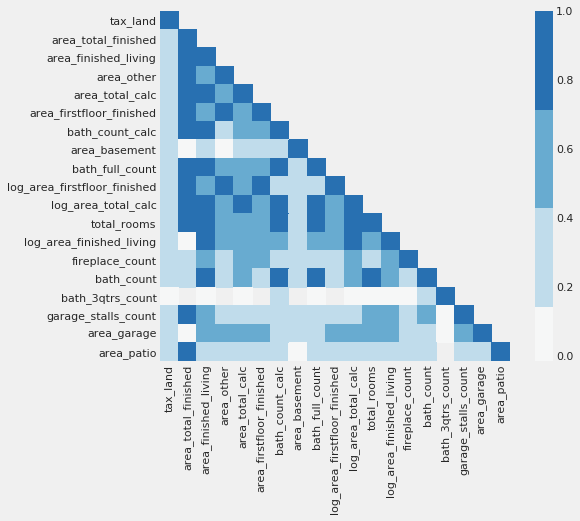

In [35]:
# Correlation matrix
features = top15cor['feature']
corrMatt = properties1[features].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask, square=True, cmap=sns.color_palette("RdBu", 7),center=0)
plt.show()

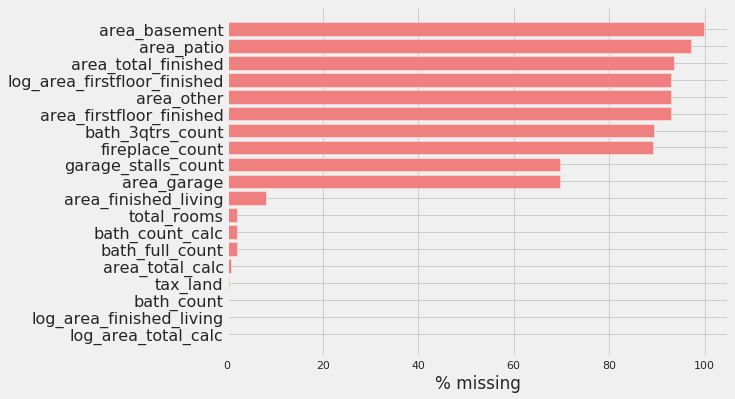

In [36]:
# Top correlated variables by % of missing values
missing_df3 = missing_df.loc[missing_df['column_name'].isin(features)]
ind = np.arange(missing_df3.shape[0])
fig, ax = plt.subplots()
rects = ax.barh(ind, missing_df3.percent_missing.values, color='lightcoral')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df3.column_name.values, rotation='horizontal',fontsize=16)
ax.set_xlabel("% missing")
plt.show()